<a href="https://colab.research.google.com/github/Youngbloodind/latihan-google-colab/blob/main/train_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Langkah 1: Import Library yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Langkah 2: Load Titanic Dataset
# Pastikan Anda sudah mengunggah file 'train.csv' ke Google Colab
df = pd.read_csv('/content/drive/My Drive/tugas machine learning/train.csv')

# Langkah 3: Tampilkan Informasi Awal Tentang Data
print("Info Data:")
print(df.info())

print("\nData Awal:")
print(df.head())

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Data Awal:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   


In [ ]:
# Langkah 4: Bersihkan Data
# Mengisi nilai yang hilang (missing values)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Mengubah kolom kategori menjadi numerik
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

# Pilih fitur yang relevan
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Langkah 5: Standardisasi Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Langkah 6: Split Data Menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Langkah 7: Buat Model KNN dan Latih Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Langkah 8: Prediksi dan Evaluasi Model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)


Akurasi Model: 0.7910447761194029


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[138  19]
 [ 37  74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



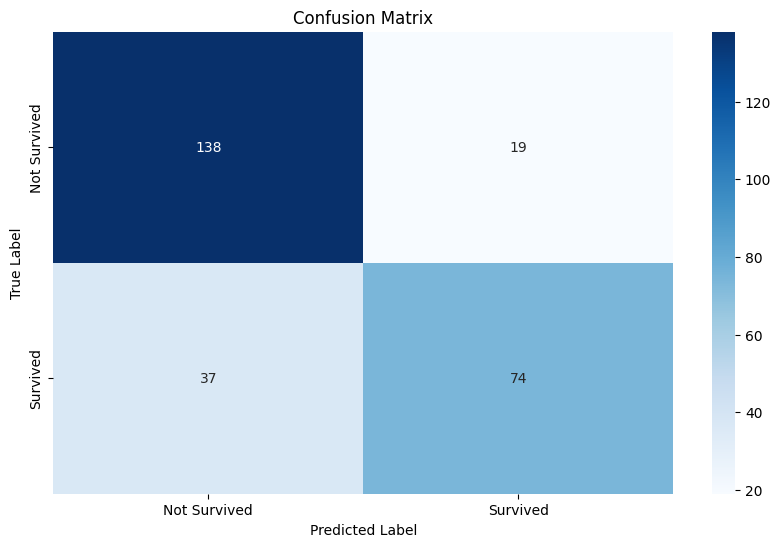


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

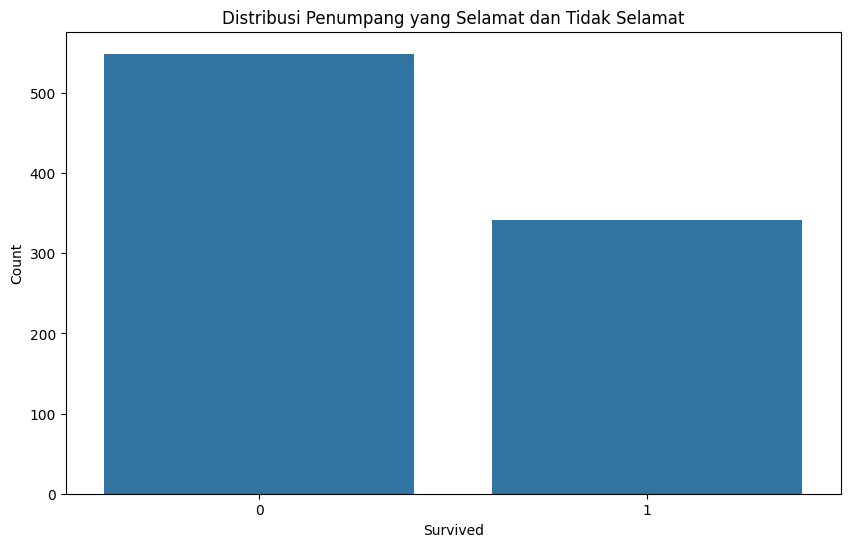

In [ ]:
# Langkah 9: Visualisasi Data

# Distribusi Penumpang yang Selamat dan Tidak Selamat
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Distribusi Penumpang yang Selamat dan Tidak Selamat')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



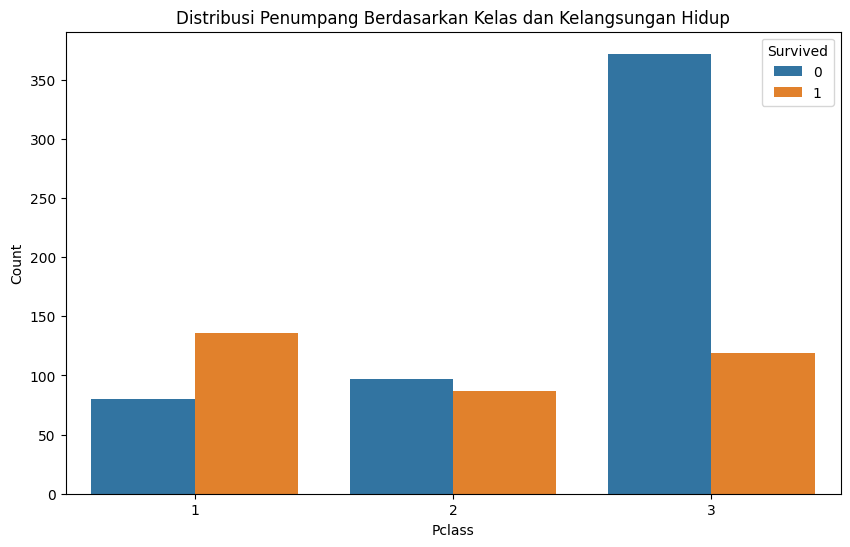

In [ ]:
# Distribusi Penumpang Berdasarkan Kelas dan Kelangsungan Hidup
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Distribusi Penumpang Berdasarkan Kelas dan Kelangsungan Hidup')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

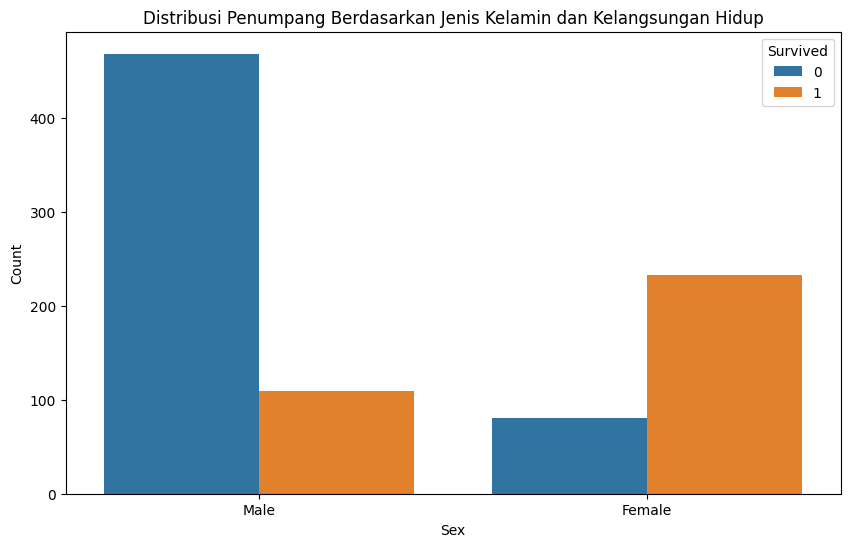

In [ ]:
# Distribusi Penumpang Berdasarkan Jenis Kelamin dan Kelangsungan Hidup
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Distribusi Penumpang Berdasarkan Jenis Kelamin dan Kelangsungan Hidup')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()